In [6]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from functools import partial

In [2]:
%config InlineBackend.figure_format = "retina"

## An example

Consider $\ell_t(x) = z_t x$

In [11]:
@jax.jit
def z(t):
    cond1 = t % 2 == 0
    cond2 = (t % 2 == 1) * (t > 1)
    cond3 = t == 1
    
    res = (
        cond1 *  1 +
        cond2 * -1 +
        cond3 * -0.5
    )
    
    return res


@jax.jit
def lossfn(x, t):
    return z(t) * x

In [84]:
def step_pogd(x_prev, vals):
    """
    Single step for the projected online gradient descent (OGD)
    """
    t, eta_t = vals
    
    # Receive loss and pay cost
    loss, gt = jax.value_and_grad(lossfn, 0)(x_prev, t)
    
    x_next = x_prev - eta_t * gt
    
    res = {
        "x": x_next,
        "loss": loss,
        "grad": gt,
    }
    
    return x_next, res

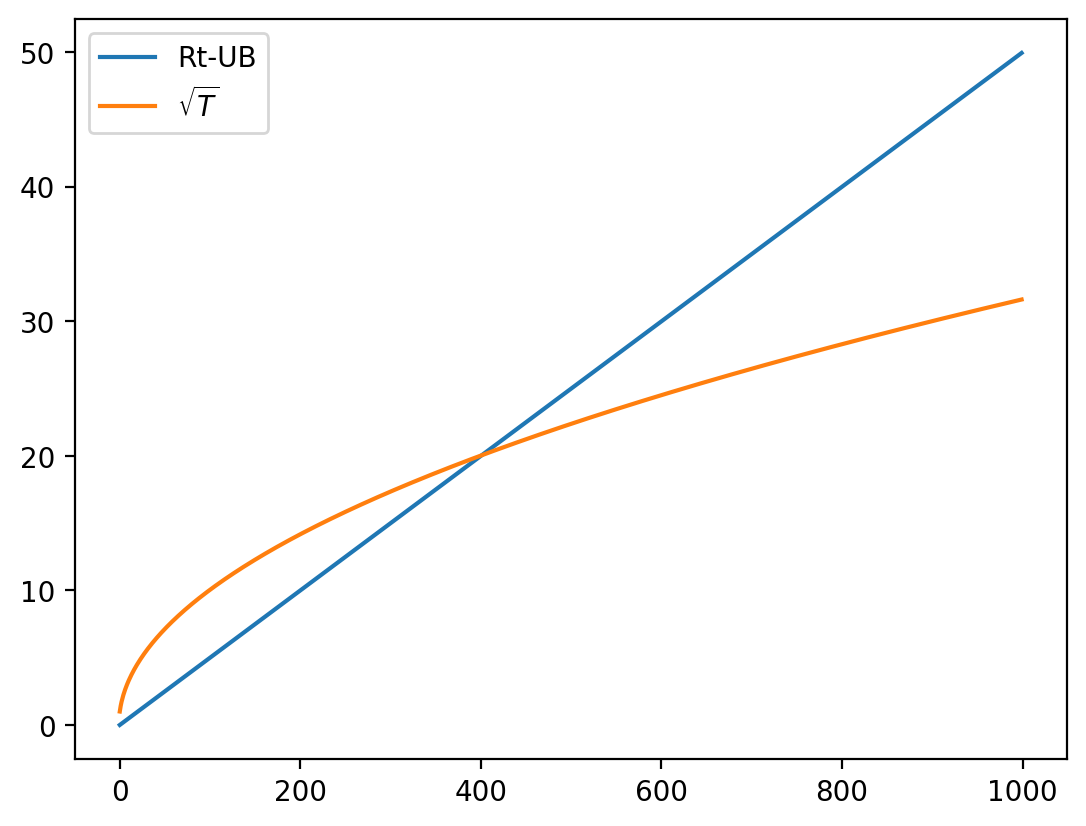

In [100]:
# Regret v.s. adversary u=0 is T - 1 - x1 / 2
T = 1000

timesteps = jnp.arange(1, T + 1)
etas = jnp.ones(T) * 0.1 #* 1 / (2 * jnp.sqrt(T))
inputs = (timesteps, etas)

x0 = 0.0
_, hist_loss = jax.lax.scan(step_pogd, x0, inputs)

plt.plot(hist_loss["loss"].cumsum(), label="Rt-UB")
plt.plot(jnp.sqrt(timesteps), label=r"$\sqrt{T}$")
plt.legend()

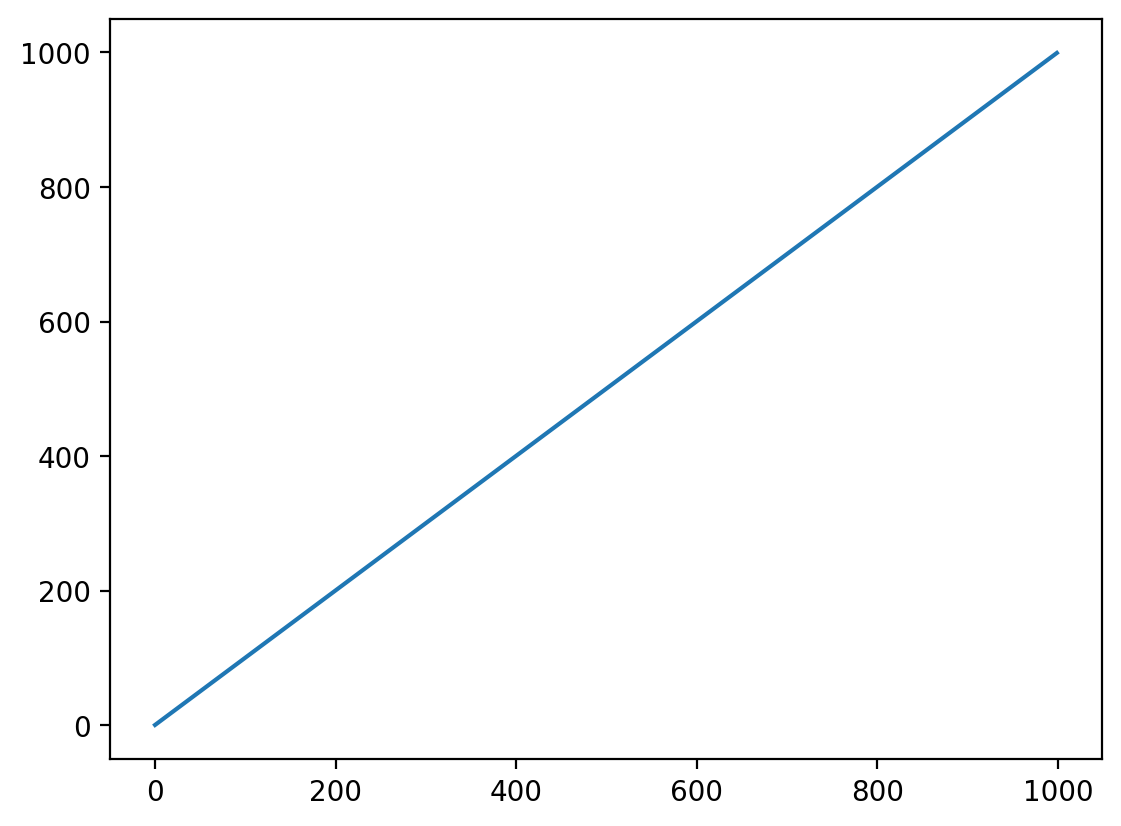

In [81]:
plt.plot((hist_loss["grad"] ** 2).cumsum())

In [20]:
@jax.jit
def x_ftl(t, x1=1.0):
    """
    FTL Agent strategy
    """
    cond1 = t % 2 == 0
    cond2 = (t % 2 == 1) * (t > 1)
    cond3 = t == 1
    
    res = (
        cond1 * 1 +
        cond2 * -1 + 
        cond3 * x1
    )
    
    return res

In [7]:
# Regret v.s. adversary u=0 is T - 1 - x1 / 2
T = 100

timesteps = jnp.arange(1, T + 1)

_, hist_loss = jax.lax.scan(partial(step_learn, agent_fn=x), 0.0, timesteps)
hist_loss

Array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
       21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5,
       32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5,
       43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5,
       54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5,
       65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5,
       76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 86.5,
       87.5, 88.5, 89.5, 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5, 97.5,
       98.5], dtype=float32, weak_type=True)